<a href="https://colab.research.google.com/github/rfajri27/a555-data-visualization/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data

## Menyiapkan semua library yang dibuthkan

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import matplotlib.image as mpimg
import urllib

## Data Wrangling

### Gathering Data

In [3]:
customers_data = pd.read_csv('data/customers_dataset.csv')
customers_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation_data = pd.read_csv('data/geolocation_dataset.csv')
geolocation_data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
orders_items_data = pd.read_csv('data/order_items_dataset.csv')
orders_items_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_payments_data = pd.read_csv('data/order_payments_dataset.csv')
order_payments_data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_reviews_data = pd.read_csv('data/order_reviews_dataset.csv')
order_reviews_data.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
order_data = pd.read_csv('data/orders_dataset.csv')
order_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
product_category = pd.read_csv('data/product_category_name_translation.csv')
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
product_data = pd.read_csv('data/products_dataset.csv')
product_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
seller_data = pd.read_csv('data/sellers_dataset.csv')
seller_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Menilai Data

In [12]:
customers_data.info()
geolocation_data.info()
order_data.info()
order_payments_data.info()
order_reviews_data.info()
orders_items_data.info()
product_data.info()
product_category.info()
seller_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  

#### Cek missing value data

In [13]:
print('\n info data null customer : \n', customers_data.isnull().sum())
print('\n info data null geolocation: \n', geolocation_data.isnull().sum())
print('\n info data null order : \n', order_data.isnull().sum())
print('\n info data null order payments: \n',
      order_payments_data.isnull().sum())
print('\n info data null order reviews : \n',
      order_reviews_data.isnull().sum())
print('\n info data null order items : \n', orders_items_data.isnull().sum())
print('\n info data null product data : \n', product_data.isnull().sum())
print('\n info data null product category : \n',
      product_category.isnull().sum())
print('\n info data null seller data : \n', seller_data.isnull().sum())


 info data null customer : 
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

 info data null geolocation: 
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

 info data null order : 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

 info data null order payments: 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

 info data null order reviews : 
 review_id                      0
order_i

### cek data duplikat

In [14]:
print('\n info data duplicated customer : ', customers_data.duplicated().sum())
print('\n info data duplicated geolocation: ',
      geolocation_data.duplicated().sum())
print('\n info data duplicated order : ', order_data.duplicated().sum())
print('\n info data duplicated order payments: ',
      order_payments_data.duplicated().sum())
print('\n info data duplicated order reviews : ',
      order_reviews_data.duplicated().sum())
print('\n info data duplicated order items : ',
      orders_items_data.duplicated().sum())
print('\n info data duplicated product data : ',
      product_data.duplicated().sum())
print('\n info data duplicated product category : ',
      product_category.duplicated().sum())
print('\n info data duplicated seller data : ', seller_data.duplicated().sum())


 info data duplicated customer :  0

 info data duplicated geolocation:  261831

 info data duplicated order :  0

 info data duplicated order payments:  0

 info data duplicated order reviews :  0

 info data duplicated order items :  0

 info data duplicated product data :  0

 info data duplicated product category :  0

 info data duplicated seller data :  0


### data describe

In [15]:
print('\n info data describe customer : \n',
      customers_data.describe(include='all'))


print('\n info data describe geolocation: \n',
      geolocation_data.describe(include='all'))


print('\n info data describe order : \n', order_data.describe(include='all'))


print('\n info data describe order payments: \n',
      order_payments_data.describe(include='all'))


print('\n info data describe order reviews : \n',
      order_reviews_data.describe(include='all'))


print('\n info data describe order items : \n',
      orders_items_data.describe(include='all'))


print('\n info data describe product data : \n',
      product_data.describe(include='all'))


print('\n info data describe product category : \n',
      product_category.describe(include='all'))


print('\n info data describe seller data : \n',
      seller_data.describe(include='all'))


 info data describe customer : 
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_pre

## data cleaning

### geolocation

In [16]:
geolocation_data.drop_duplicates(inplace=True)

### orders review

In [17]:
order_reviews_data[order_reviews_data.review_comment_title.isnull()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [18]:
order_reviews_data.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

In [19]:
order_reviews_data.drop(columns=['review_comment_title'], inplace=True)

In [20]:
order_reviews_data[order_reviews_data.review_comment_message.isnull()]

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [21]:
order_reviews_data.review_comment_message.value_counts()

review_comment_message
Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                            

In [22]:
order_reviews_data.fillna(value='no_comment', inplace=True)
order_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_message   99224 non-null  object
 4   review_creation_date     99224 non-null  object
 5   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.5+ MB


In [23]:
convert_to_datetime_order_reviews_data = [
    'review_creation_date', 'review_answer_timestamp']


for convert in convert_to_datetime_order_reviews_data:

    order_reviews_data[convert] = pd.to_datetime(order_reviews_data[convert])


order_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_message   99224 non-null  object        
 4   review_creation_date     99224 non-null  datetime64[ns]
 5   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 4.5+ MB


### order data

In [24]:
convert_to_datetime_order_data = ['order_purchase_timestamp', 'order_approved_at',
                                  'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


for convert in convert_to_datetime_order_data:

    order_data[convert] = pd.to_datetime(order_data[convert])


order_data['delivered_on_time'] = order_data.order_delivered_customer_date <= order_data.order_estimated_delivery_date


order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   delivered_on_time              99441 non-null  bool          
dtypes: bool(1), datetime64[ns](5), object(3)
memory usage: 6.2+ MB


### order items data

In [25]:
orders_items_data.shipping_limit_date = pd.to_datetime(
    orders_items_data.shipping_limit_date)


orders_items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


### products

In [26]:
product_data[product_data.product_category_name.isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [ ]:
product_data.product_category_name.fillna(value='other', inplace=True)
product_data.product_photos_qty.fillna(value=0, inplace=True)
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


## exploratory data analysis (EDA)

### __customer__

In [ ]:
customers_data.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
22503,7d05105156cf3f275a36a6dc8c5d479b,858c371ab6f1a864c7989565abf512f1,3639,sao paulo,SP
6096,6d84c2a1d0700d51abff6b1aa6024a58,ab0369f66ee9ae7a31ebc491f73b5c5b,4006,sao paulo,SP
180,0ca483f116807018eaa073ff9ad84246,fd3c867c2bcd048675609cf2b0f1aedb,15054,sao jose do rio preto,SP
54829,25f1a26f2cd003472ee7fc88e9da8adb,57b5d9f9fa4f1ff41befbfbf0fcbc3ca,30320,belo horizonte,MG
29518,42ca3cf7c637265888941245a3b1447c,b7452c2bff3bfdbe63b773bd744d3d46,11713,praia grande,SP
1583,7a4f856dbe52b7cbb2c19b2fb79f03e4,663b8dc399b315977cb3f44fbd391d37,29850,ecoporanga,ES
45462,ba95e79f286d22117a9f0a8c543d7a4e,135e6f5355e331418378a4cdf240c52d,22290,rio de janeiro,RJ
47444,79c0aec7e6a81127ed9cc488a0cbc077,01bdeb2c0f524bb2119a8c0cd5419f5f,4747,sao paulo,SP
17064,d022cc2c5b40e84f1c19866f337c7a68,bbf0d1ddbf8bd44d192f056919e9b706,86802,apucarana,PR
77511,bee38172e88b59389711a1147ac7521a,62b577bd271ab007b66862f5126f9fde,17514,marilia,SP


In [29]:
customers_data.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [30]:
customers_data.groupby('customer_city').customer_unique_id.nunique(
).sort_values(ascending=False).head(10)

customer_city
sao paulo                14984
rio de janeiro            6620
belo horizonte            2672
brasilia                  2069
curitiba                  1465
campinas                  1398
porto alegre              1326
salvador                  1209
guarulhos                 1153
sao bernardo do campo      908
Name: customer_unique_id, dtype: int64

In [31]:
customers_data.groupby('customer_state').customer_unique_id.nunique(
).sort_values(ascending=False).head(10)

customer_state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
SC     3534
BA     3277
DF     2075
ES     1964
GO     1952
Name: customer_unique_id, dtype: int64

### __order_payments__

In [32]:
order_payments_data.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
97052,e7ac1f7da9fc50f093b196993cb761e3,1,credit_card,4,42.50
13553,640aef9709beda161ca0b5af58ac437c,1,boleto,1,286.55
19711,a36a7f2219c828e52cb094ddc8d89b84,1,credit_card,2,195.60
67599,2a430c80705b17c17f1e9e5b138e52d5,1,credit_card,2,236.82
49989,b65e9f6d886f2fd5807096ed8f4a72fc,1,credit_card,3,33.43
28128,7290e4e9da44a65e4da02e797ec28037,1,credit_card,10,367.20
17937,9a55f6c39b39d7b71a170dab3430e29f,1,credit_card,2,121.00
100965,555e1afa0cf180760b7ea9f6d8ebc329,1,voucher,1,88.47
79397,33712c34fc0af28b0b57a36f2b26cba8,1,credit_card,2,156.22
37293,d34f40889c88789d3d30f961b338c4f9,1,boleto,1,64.53


In [33]:
order_payments_data.groupby(
    'payment_type').order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

### __order_data__

In [34]:
order_data.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
77496,420b64be551875169e87fb4a82d5fe13,43be7f68acb621076bde97c734132eb6,delivered,2018-04-02 09:25:04,2018-04-02 09:35:20,2018-04-04 00:12:15,2018-04-23 15:28:34,2018-05-04,True
93699,4c9bccc9e2d922b92bc00ab2e7c8903e,28e29591108d2c2904cb2058cd602984,delivered,2017-07-13 07:52:36,2017-07-13 08:05:11,2017-07-13 21:32:57,2017-07-17 15:49:43,2017-07-26,True
23598,911e973fcd823c79ed2f924eef8b0874,6ba66a8857593089687875fd781e8efb,delivered,2018-02-19 15:19:49,2018-02-19 16:27:25,2018-02-20 20:39:14,2018-02-21 22:12:50,2018-03-05,True
28159,d6021b689d20a82e885a61d75888df6a,e811ef51626307094e57cf8d443dd4fb,delivered,2018-04-03 07:28:21,2018-04-03 07:50:12,2018-04-05 14:19:22,2018-04-09 21:08:38,2018-04-25,True
66079,b892363712f6b1e323ab40749a9531bb,d55023a644392a6e51f8b824538c54a5,delivered,2018-04-18 00:25:00,2018-04-19 02:32:39,2018-04-23 15:36:57,2018-04-24 15:51:44,2018-05-03,True
59029,eabed9663301465ad2a903c519caae63,9f9587941a9fbed8cd27d38cd793fba2,delivered,2017-04-22 11:33:13,2017-04-22 11:45:13,2017-04-24 15:58:20,2017-05-03 11:21:43,2017-05-25,True
71750,8da3063f18b30c590bab1b8d083b03fd,6d611cdbc4cc0607f840cfbb7ae94f56,delivered,2017-09-10 19:26:12,2017-09-10 19:43:28,2017-09-12 13:07:48,2017-09-19 19:28:08,2017-10-02,True
26362,e1a73a8183d164944b0f44e1eb39ea7d,0e412f1b10cc95f4ab840edd052b51c5,delivered,2018-04-18 08:48:01,2018-04-18 09:11:46,2018-04-23 18:46:49,2018-04-27 20:22:24,2018-05-11,True
71128,0b5680deaa067376ba987f02b755e8bd,733c47cbefbef886d7cea3f0c37fdb22,delivered,2018-08-19 13:20:33,2018-08-20 11:49:54,2018-08-20 16:19:00,2018-08-24 11:18:53,2018-09-19,True
59106,2e59e4db9ac621c946e8451c300f1317,61d359e1107b398326e830d479b466de,delivered,2017-05-17 11:27:13,2017-05-17 11:42:27,2017-05-17 13:52:39,2017-05-22 22:13:59,2017-06-06,True


In [35]:
order_data.delivered_on_time.value_counts()

delivered_on_time
True     88649
False    10792
Name: count, dtype: int64

### __customer_data and order_data__

merge customer_data & order_data

In [36]:
merge_customer_and_order = pd.merge(
    left=customers_data,
    right=order_data,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
merge_customer_and_order.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,True
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,True
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,False
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,True
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,True


In [37]:
merge_customer_and_order.groupby(
    'customer_city').order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

In [38]:
merge_customer_and_order.groupby(
    'customer_state').order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

In [39]:
merge_customer_and_order.groupby(
    'order_status').order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

In [40]:
merge_customer_and_order.delivered_on_time.value_counts()

delivered_on_time
True     88649
False    10792
Name: count, dtype: int64

__merge order payments dan order review__

In [41]:
merge_payment_review_order = pd.merge(
    left=order_payments_data,
    right=order_reviews_data,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
merge_payment_review_order.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,no_comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,no_comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,no_comment,2017-12-21,2017-12-22 01:10:39


In [42]:
merge_payment_review_order.groupby(
    'payment_type').order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [43]:
merge_payment_review_order.groupby('payment_type').agg({
    'order_id': 'nunique',
    'payment_value': ['min', 'max', 'mean', 'sum']
})

order_id payment_value                                   
              nunique           min       max        mean          sum
payment_type                                                          
boleto          19784         11.62   7274.88  144.986413   2886679.49
credit_card     76505          0.01  13664.08  163.140977  12594157.13
debit_card       1528         13.38   4445.50  142.396569    218721.13
not_defined         3          0.00      0.00    0.000000         0.00
voucher          3866          0.00   3184.34   65.499655    381862.99

__merge customer order & order payment review__

In [44]:
merge_customer_order_payment_review = pd.merge(
    left=merge_customer_and_order,
    right=merge_payment_review_order,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
merge_customer_order_payment_review.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,delivered_on_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,True,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,no_comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,True,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,no_comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,False,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,no_comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,True,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,no_comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,True,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


## order_items_data & seller_data

merge order_items_data & seller_data

In [45]:
orders_items_data.sample(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
27643,3edd96ebb65c183ccdf9109dd48930ee,1,d03bd02af9fff4b98f1c972315e5e9ef,0241d4d5d36f10f80c644447315af0bd,2018-02-20 10:15:29,79.90,14.29
44718,65a922b4c66d6c7389088e16d37a85e9,1,a5f6ba3fe91a2e73f10b612131cb2404,4e922959ae960d389249c378d1c939f5,2017-06-08 08:55:11,39.00,15.10
24557,37ee401157a3a0b28c9c6d0ed8c3b24b,8,d34c07a2d817ac73f4caf8c574215fed,e7d5b006eb624f13074497221eb37807,2018-04-19 02:30:52,29.99,7.39
50789,737a52582de776db2631a7d53cb29eed,1,635b74f3dd5462e3c133b42cd9299fa2,b2ba3715d723d245138f291a6fe42594,2017-06-06 06:55:34,49.90,11.85
14716,219011b6543055a960c7dd94cc5e0770,2,fb20d37a2c78452667f7a347e756727c,e26901d5ab434ce92fd9b5c256820a4e,2017-04-24 12:02:54,34.90,10.96
30718,45b0b9012eea515351639078d2676a65,1,10f2ada0cff82206dc9afa52ebac690b,1bb2bdb95f4841f1bba2c0d2cd83d3c9,2018-06-06 03:30:57,19.95,15.23
57660,833124c58a852f0accaa7c09219e2967,1,c2c6d6cfda3171733ed7af121e46f6a9,76d5af76d0271110f9af36c92573f765,2018-03-08 13:01:11,19.90,15.10
88065,c7fda56679ce4368d59d2d9511b3c19d,1,b0158470e56400701f25e14c9cd4a33b,7a67c85e85bb2ce8582c35f2203ad736,2018-08-08 20:24:35,159.99,23.40
28435,40bc1f323f6bb2c5fb7d2cae41952a21,1,52d7a7207b9646509bdc754fed3a0cef,cca3071e3e9bb7d12640c9fbe2301306,2018-01-12 16:52:29,52.64,11.87
95925,d9a34b9554a76f98e59becbf5b49a871,1,2dc2efef0bbccb4ea53e2a21cdd52dc7,adbc26658d6c7b4b6219f9d934598091,2017-11-08 13:25:21,130.00,19.07


In [46]:
seller_data.sample(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
296,e503f22be6a4f456d9851920a5d9c670,4508,sao paulo,SP
1863,520b493b57809f446cb0a233bb3e25c7,11075,santos,SP
2144,659e8466eb3ff1b0e8740d74fb7bbedd,45820,eunapolis,BA
84,b56906f7fd1696e043f1bcce164c487b,19830,echapora,SP
2911,d101c6da914ae3d53f7bee42283f2fe2,8072,sao paulo,SP
1872,88cd3681e0a2ba85e190f7d817629c4c,88354,brusque,SC
1695,ade45994b717ccee333492330fbf037b,87505,umuarama,PR
1445,10cdd491d1dbea8fb4ead97b19c334ce,37540,santa rita do sapucai,MG
1821,119d1aef1b4144adba89163f6cd9f5d4,13920,pedreira,SP
2934,6bd503a8230299c9316fb0f726933927,75650,morrinhos,GO


In [47]:
merge_items_seller_product = pd.merge(
    left=orders_items_data,
    right=seller_data,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
merge_items_seller_product.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [48]:
merge_items_seller_product.groupby(
    'seller_city').order_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo                24588
ibitinga                  6565
curitiba                  2722
santo andre               2711
belo horizonte            2414
rio de janeiro            2193
guarulhos                 2071
ribeirao preto            2019
sao jose do rio preto     1973
maringa                   1860
Name: order_id, dtype: int64

In [49]:
merge_items_seller_product.groupby(
    'seller_state').order_id.nunique().sort_values(ascending=False).head(10)

seller_state
SP    70188
MG     7930
PR     7673
RJ     4353
SC     3667
RS     1989
DF      824
BA      569
GO      463
PE      406
Name: order_id, dtype: int64

## product & product category

In [50]:
product_data.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
22268,def3587f2a221b89fc8f342e858b2176,moveis_decoracao,33.0,1189.0,1.0,16617.0,101.0,8.0,57.0
23983,1647c3a7ca962b86bad1f87a895f582d,automotivo,43.0,962.0,1.0,350.0,20.0,15.0,15.0
11249,30b159b653b87754d7a38446c7ef4669,fashion_bolsas_e_acessorios,49.0,1398.0,1.0,200.0,16.0,2.0,11.0
10708,b6e406be1aa00db8be5dd3ec6b524d4d,moveis_decoracao,63.0,603.0,2.0,25100.0,70.0,60.0,60.0
348,4c303e0fd131aa3fe487c108b5aa8c06,artigos_de_festas,58.0,134.0,1.0,1300.0,70.0,11.0,11.0
25535,06b6d4805b3659e45575c03e57cef6fb,fashion_bolsas_e_acessorios,29.0,204.0,1.0,100.0,21.0,9.0,14.0
25130,a213969f10be36f5ef5717a3c2c27952,bebes,60.0,441.0,4.0,11100.0,79.0,23.0,23.0
21225,0f7b5d8f0464562dd0d3e46054e0bd0e,beleza_saude,39.0,1761.0,1.0,2500.0,16.0,19.0,15.0
6337,e4ae7159ae9fb57d158004d7435ea920,informatica_acessorios,51.0,931.0,3.0,5690.0,30.0,23.0,25.0
25461,fdd4f5e099d232bbd0d1fca8eab34172,fashion_bolsas_e_acessorios,29.0,110.0,1.0,200.0,16.0,10.0,15.0


In [ ]:
product_category.sample(10)

,product_category_name,product_category_name_english
67,artes_e_artesanato,arts_and_craftmanship
3,cama_mesa_banho,bed_bath_table
59,cine_foto,cine_photo
23,malas_acessorios,luggage_accessories
45,alimentos,food
32,eletronicos,electronics
65,dvds_blu_ray,dvds_blu_ray
54,artigos_de_natal,christmas_supplies
29,pet_shop,pet_shop
22,cool_stuff,cool_stuff


merge product data & product category

In [52]:
merge_product_category = pd.merge(
    left=product_data,
    right=product_category,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)
merge_product_category.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [53]:
merge_product_category.groupby('product_category_name_english').product_id.nunique(
).sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

In [54]:
merge_product_category.groupby('product_category_name').product_id.nunique(
).sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

merge items_seller_product & product_category

In [55]:
merge_seller_product = pd.merge(
    left=merge_product_category,
    right=merge_items_seller_product,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
merge_seller_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [56]:
merge_seller_product.sort_values(by='price', ascending=False).head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
84506,259037a6a41845e455183f89c5035f18,pcs,55.0,1710.0,2.0,2900.0,35.0,10.0,40.0,computers,8dbc85d1447242f3b127dda390d56e19,1,c72de06d72748d1a0dfb2125be43ba63,2018-06-28 12:36:36,4590.00,91.78,46430,guanambi,BA
106405,a1beef8f3992dbd4cd8726796aa69c53,instrumentos_musicais,59.0,944.0,3.0,3550.0,71.0,34.0,22.0,musical_instruments,426a9742b533fc6fed17d1fd6d143d7e,1,512d298ac2a96d1931b6bd30aa21f61d,2018-08-16 14:24:28,4399.87,113.45,20060,rio de janeiro,RJ
104826,6cdf8fc1d741c76586d8b6b15e9eef30,consoles_games,59.0,3172.0,1.0,3050.0,34.0,10.0,22.0,consoles_games,68101694e5c5dc7330c91e1bbc36214f,1,ed4acab38528488b65a9a9c603ff024a,2018-04-05 08:27:27,4099.99,75.27,8260,sao paulo,SP
46034,dd113cb02b2af9c8e5787e8f1f0722f6,esporte_lazer,51.0,1511.0,1.0,8000.0,55.0,25.0,45.0,sports_leisure,b239ca7cd485940b31882363b52e6674,1,821fb029fc6e495ca4f08a35d51e53a5,2018-08-02 08:15:14,4059.00,104.51,2030,sao paulo,SP
40027,6902c1962dd19d540807d0ab8fade5c6,relogios_presentes,53.0,1773.0,2.0,800.0,16.0,11.0,11.0,watches_gifts,86c4eab1571921a6a6e248ed312f5a5a,1,fa1c13f2614d7b5c4749cbc52fecda94,2017-03-23 20:08:04,3999.90,17.01,13170,sumare,SP


In [57]:
merge_seller_product.groupby('product_category_name_english').agg({
    'order_id': 'nunique',
    'price': ['min', 'max', 'mean', 'sum']
})

order_id  price                                 
                               nunique    min      max        mean         sum
product_category_name_english                                                 
agro_industry_and_commerce         182  12.99  2990.00  342.124858    72530.47
air_conditioning                   253  10.90  1599.00  185.269226    55024.96
art                                202   3.50  6499.00  115.802105    24202.64
arts_and_craftmanship               23   9.80   289.49   75.583750     1814.01
audio                              350  14.90   598.99  139.254121    50688.50
...                                ...    ...      ...         ...         ...
stationery                        2311   2.29  1693.00   91.753369   230943.23
tablets_printing_image              79  14.90   889.99   90.703735     7528.41
telephony                         4199   5.00  2428.00   71.213978   323667.53
toys                              3886   4.90  1699.99  117.548360   483946.60
watches_gifts                     5624   8.99  3999.90  201.135984  1205005.68

[71 rows x 5 columns]

## geolocation

In [58]:
geolocation_data.sample(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
701804,48470,-11.360500,-38.327102,olindina,BA
708119,49900,-10.217793,-36.839669,propria,SE
654265,38706,-18.634113,-46.493244,patos de minas,MG
316039,13632,-22.012941,-47.414679,pirassununga,SP
899547,87890,-22.716902,-52.617126,terra rica,PR
651858,38600,-17.236460,-46.883337,paracatu,MG
520610,28890,-22.469502,-41.938554,rio das ostras,RJ
539513,29785,-18.994780,-40.385654,vila valerio,ES
76118,4152,-23.624704,-46.620971,sao paulo,SP
70559,3944,-23.607977,-46.491062,são paulo,SP


In [59]:
geolocation_data.groupby('geolocation_city').geolocation_zip_code_prefix.nunique(
).sort_values(ascending=False).head(10)

geolocation_city
sao paulo         3171
são paulo         3013
brasilia           496
brasília           406
rio de janeiro     404
salvador           275
goiania            233
goiânia            210
belo horizonte     205
fortaleza          172
Name: geolocation_zip_code_prefix, dtype: int64

In [60]:
geolocation_data.groupby('geolocation_zip_code_prefix').size(
).sort_values(ascending=False).head(10)

geolocation_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
38408    621
39400    620
35162    611
37200    596
35900    589
dtype: int64

In [61]:
geolocation_data[geolocation_data.geolocation_zip_code_prefix == 22790].head(
    10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
454148,22790,-23.011335,-43.450256,rio de janeiro,RJ
454149,22790,-23.009535,-43.436039,rio de janeiro,RJ
454155,22790,-23.018713,-43.452904,rio de janeiro,RJ
454162,22790,-23.005940,-43.481812,rio de janeiro,RJ
454163,22790,-23.006000,-43.481799,rio de janeiro,RJ
454169,22790,-23.017203,-43.451222,rio de janeiro,RJ
454174,22790,-23.009410,-43.435570,rio de janeiro,RJ
454179,22790,-23.022137,-43.487044,rio de janeiro,RJ
454180,22790,-23.020964,-43.469564,rio de janeiro,RJ
454183,22790,-23.011119,-43.443296,rio de janeiro,RJ


### explore semua data

In [62]:
merge_all = pd.merge(
    left=merge_customer_order_payment_review,
    right=merge_seller_product,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
merge_all.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,15.0,sports_leisure,1.0,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,13.0,computers_accessories,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,4102.0,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,20.0,NaN,1.0,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11,4142.0,sao paulo,SP
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,12.0,toys,1.0,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10,21210.0,rio de janeiro,RJ
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,30.0,furniture_decor,1.0,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57,80330.0,curitiba,PR


In [63]:
merge_all.duplicated().sum()

0

In [64]:
merge_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

In [65]:
merge_all.groupby(by=['customer_city', 'product_category_name_english']).agg({
    'price': 'sum',
    'payment_value': 'sum'
})

price  payment_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          58.28
                    cool_stuff                     199.00         219.63
                    sports_leisure                 120.00         135.59
abadiania           small_appliances               949.99        1025.52
abaete              baby                            65.00          82.70
...                                                   ...            ...
ze doca             food_drink                      65.00         103.00
                    garden_tools                    39.90          66.51
                    musical_instruments            359.00         408.04
                    sports_leisure                 149.90         188.50
zortea              computers_accessories           69.90          90.88

[25199 rows x 2 columns]

In [66]:
merge_all.groupby('product_category_name_english').agg({
    'price': 'mean',
    'review_score': 'mean'
})

,price,review_score
product_category_name_english,,
agro_industry_and_commerce,332.706151,4.150794
air_conditioning,185.305894,3.969697
art,112.885708,3.935484
arts_and_craftmanship,75.583750,4.125000
audio,137.795984,3.840849
...,...,...
stationery,91.194655,4.188339
tablets_printing_image,90.118506,4.117647
telephony,71.851678,3.948849


In [67]:
merge_all.to_csv('data/merge_all.csv', index=False)

## visualization

### 1. kategori produk apa yang paling banyak dan paling sedikit terjual?

In [68]:
produk_analisis = merge_all.groupby('product_category_name_english')[
    'product_id'].count().reset_index()
produk_analisis = produk_analisis.sort_values(by='product_id', ascending=False)
produk_analisis.rename(columns={'product_id': 'total_product'}, inplace=True)

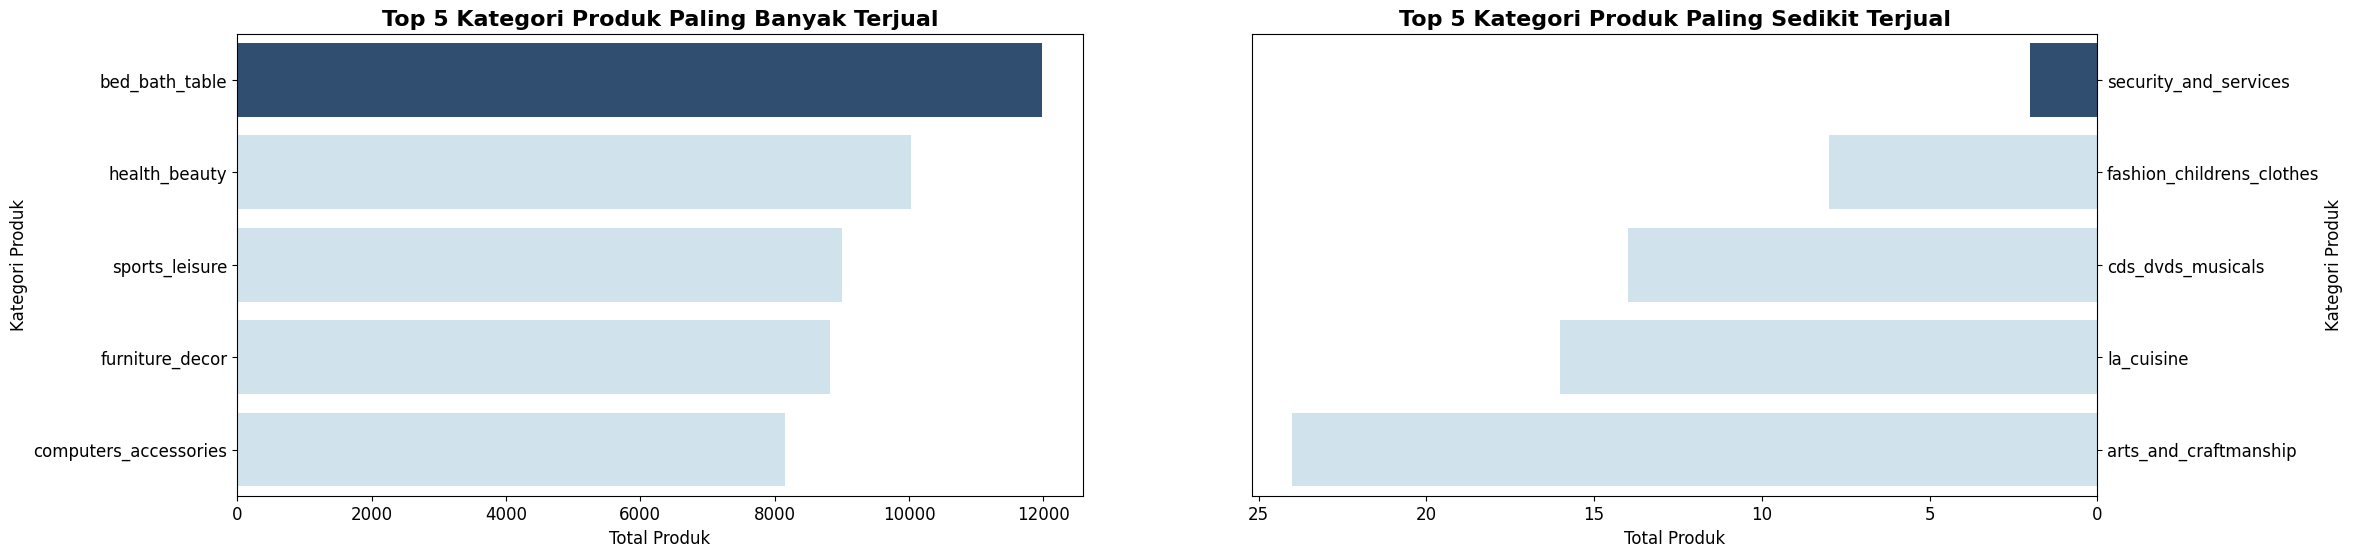

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ['#254E7A', '#CBE3EF', '#CBE3EF', '#CBE3EF', '#CBE3EF']

sns.barplot(x='total_product', y='product_category_name_english', data=produk_analisis.head(
    5), hue='product_category_name_english', palette=colors, ax=ax[0])
ax[0].set_title('Top 5 Kategori Produk Paling Banyak Terjual',
                loc='center', fontsize=16, fontweight='bold')
ax[0].set_xlabel('Total Produk', fontsize=12)
ax[0].set_ylabel('Kategori Produk', fontsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].tick_params(axis='x', labelsize=12)

sns.barplot(x='total_product', y='product_category_name_english', data=produk_analisis.sort_values(
    by='total_product', ascending=True).head(5), hue='product_category_name_english', palette=colors, ax=ax[1])
ax[1].set_title('Top 5 Kategori Produk Paling Sedikit Terjual',
                loc='center', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Total Produk', fontsize=12)
ax[1].set_ylabel('Kategori Produk', fontsize=12)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize=12)

### 2. bagaimana tren penjualan berdasarkan waktu

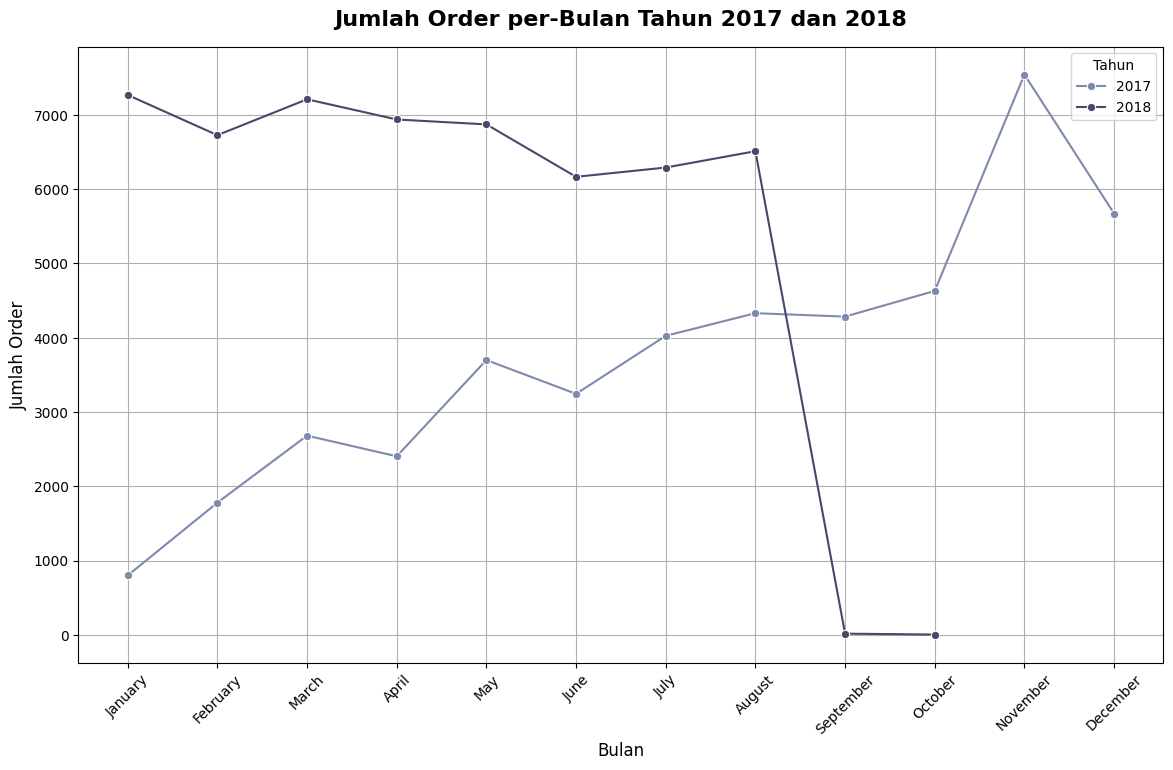

In [70]:
merge_all['year'] = merge_all['order_purchase_timestamp'].dt.year
merge_all['month'] = merge_all['order_purchase_timestamp'].dt.month

filtered_data = merge_all[merge_all['year'].isin([2017, 2018])]

monthly_data_analysis = filtered_data.groupby(['year', 'month']).agg({
    'order_id': 'nunique',
    'payment_value': 'sum'
}).reset_index()

monthly_data_analysis.rename(columns={
    'order_id': 'total_orders',
    'payment_value': 'total_payment'
}, inplace=True)

month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

monthly_data_analysis['month'] = monthly_data_analysis['month'].map(
    month_mapping)

plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_data_analysis, x='month', y='total_orders',
             hue='year', palette=['#7E8AAD', '#45496A'], marker='o')
plt.title('Jumlah Order per-Bulan Tahun 2017 dan 2018',
          fontsize=16, fontweight='bold', loc='center', pad=15)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Order', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tahun')
plt.grid(True)
plt.show()

### 3. bagaimana skor review mempengaruhi penjualan?

C:\Users\Asus-PC\AppData\Local\Temp\ipykernel_20708\2421283270.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orders_by_review_score, x='review_score',


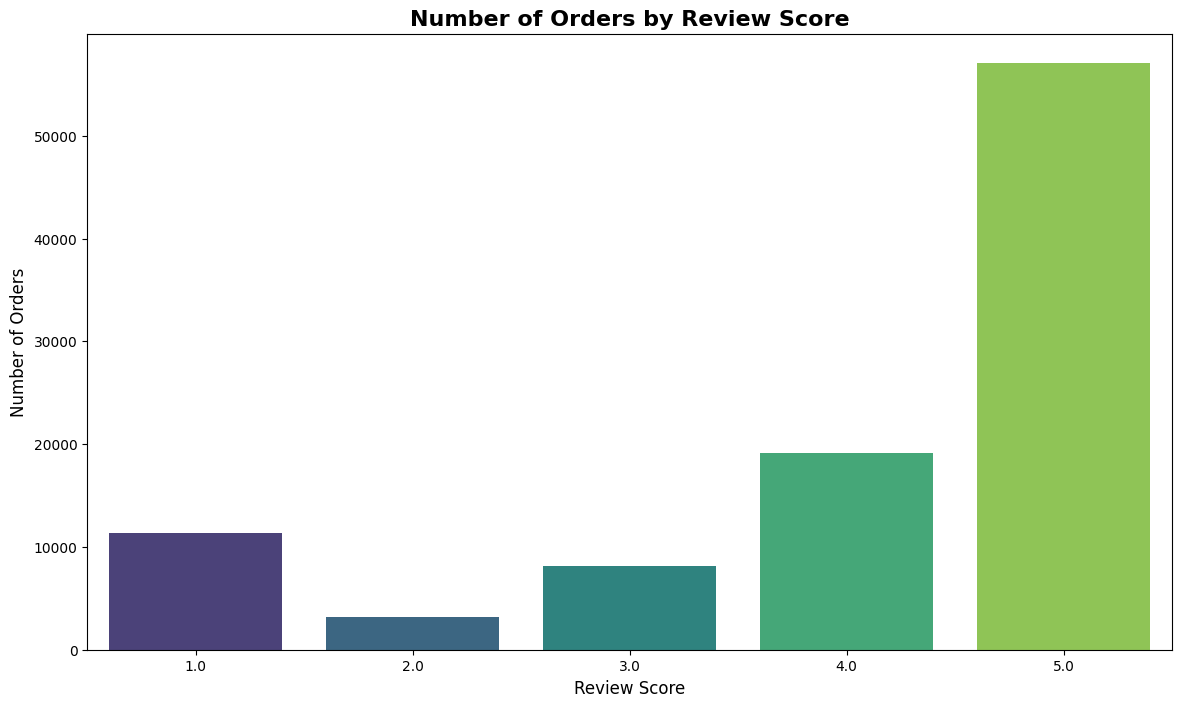

In [71]:
orders_by_review_score = merge_all.groupby(
    'review_score')['order_id'].nunique().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=orders_by_review_score, x='review_score',
            y='order_id', palette='viridis')
plt.title('Number of Orders by Review Score', fontsize=16, fontweight='bold')
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.show()

### 4. dimanakah lokasi yang memiliki pelanggan terbanyak?

In [72]:
other_state_geolocation = geolocation_data.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = geolocation_data.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [73]:
geolocation_silver = geolocation_data.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [74]:
customers_silver = customers_data.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')
customers_silver.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,franca,SP,-20.502307,-47.39674
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,14409,franca,SP,-20.502307,-47.39674
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,14409,franca,SP,-20.502307,-47.39674
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,14409,franca,SP,-20.502307,-47.39674
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,14409,franca,SP,-20.502307,-47.39674


In [75]:
customers_silver.to_csv("geolocation.csv", index=False)

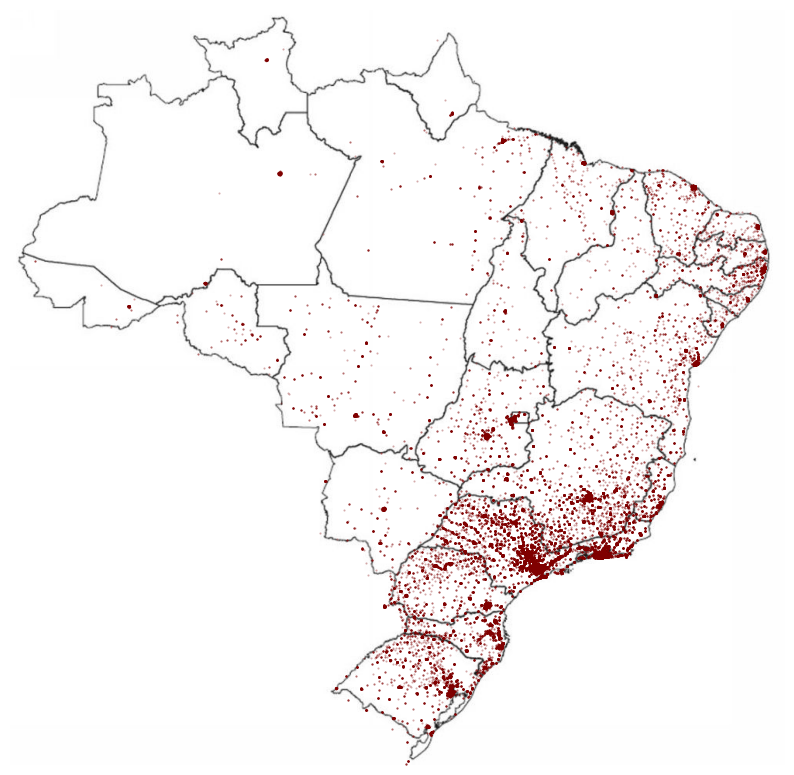

In [82]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

### RFM analysis

In [163]:
rfm_data = merge_all.groupby(by='customer_unique_id', as_index=False).agg({
    'order_purchase_timestamp': 'max',
    'order_id': 'nunique',
    'payment_value': 'sum'
})
rfm_data.columns = ['customer_unique_id',
                    'max_order_timestamp', 'frequency', 'monetary']
rfm_data['max_order_timestamp'] = rfm_data['max_order_timestamp'].dt.date
recent_date = merge_all['order_purchase_timestamp'].dt.date.max()


def calculate_recency(order_date):
    return (recent_date - order_date).days


rfm_data['recency'] = rfm_data['max_order_timestamp'].apply(calculate_recency)
rfm_data.drop('max_order_timestamp', axis=1, inplace=True)
rfm_data.head()

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,163
2,0000f46a3911fa3c0805444483337064,1,86.22,586
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,370
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,337


In [172]:
recent_date = merge_all['order_purchase_timestamp'].max() + timedelta(days=1)

rfm_data = merge_all.groupby(by='customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (recent_date - x.max()).days,
    'order_id': 'nunique',
    'payment_value': 'sum'
}).reset_index()

rfm_data.rename(columns={
    'order_purchase_timestamp': 'recency',
    'order_id': 'frequency',
    'payment_value': 'monetary'
}, inplace=True)

In [174]:
rfm_data['R_Score'] = pd.qcut(rfm_data['recency'], 5, labels=[
                              5, 4, 3, 2, 1]).astype(int)
rfm_data['F_Score'] = pd.qcut(rfm_data['frequency'].rank(
    method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)
rfm_data['M_Score'] = pd.qcut(rfm_data['monetary'], 5, labels=[
                              1, 2, 3, 4, 5]).astype(int)

rfm_data['RFM_Score'] = rfm_data['R_Score'].map(
    str) + rfm_data['F_Score'].map(str) + rfm_data['M_Score'].map(str)

In [175]:
# Menentukan fungsi segmentasi
def segment(x):
    if x['R_Score'] >= 4 and x['F_Score'] >= 4 and x['M_Score'] >= 4:
        return 'Best Customers'
    elif x['R_Score'] >= 4 and x['F_Score'] <= 2:
        return 'New Customers'
    elif x['R_Score'] >= 3 and x['F_Score'] >= 3 and x['M_Score'] >= 3:
        return 'Loyal Customers'
    else:
        return 'Others'


# Menerapkan segmentasi
rfm_data['Segment'] = rfm_data.apply(segment, axis=1)

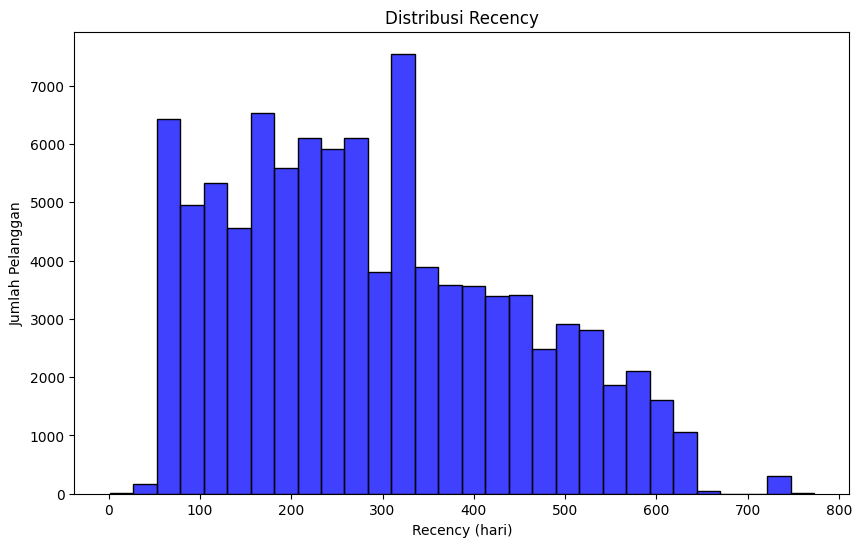

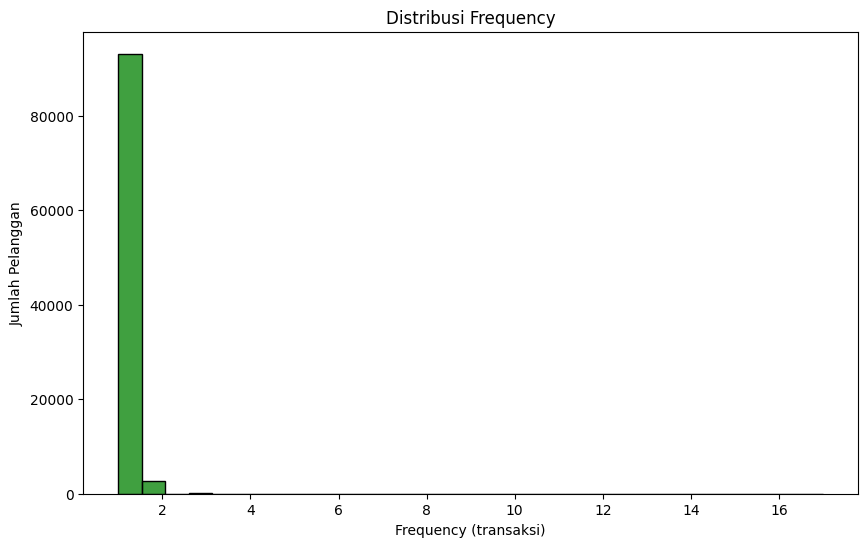

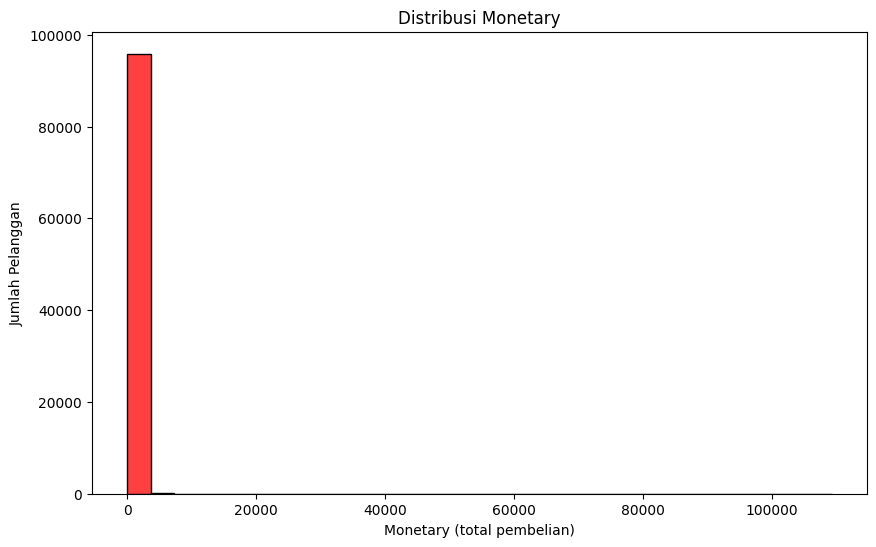

In [179]:
# Plot distribusi Recency
plt.figure(figsize=(10, 6))
sns.histplot(rfm_data['recency'], bins=30, kde=False, color='blue')
plt.title('Distribusi Recency')
plt.xlabel('Recency (hari)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Plot distribusi Frequency
plt.figure(figsize=(10, 6))
sns.histplot(rfm_data['frequency'], bins=30, kde=False, color='green')
plt.title('Distribusi Frequency')
plt.xlabel('Frequency (transaksi)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Plot distribusi Monetary
plt.figure(figsize=(10, 6))
sns.histplot(rfm_data['monetary'], bins=30, kde=False, color='red')
plt.title('Distribusi Monetary')
plt.xlabel('Monetary (total pembelian)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

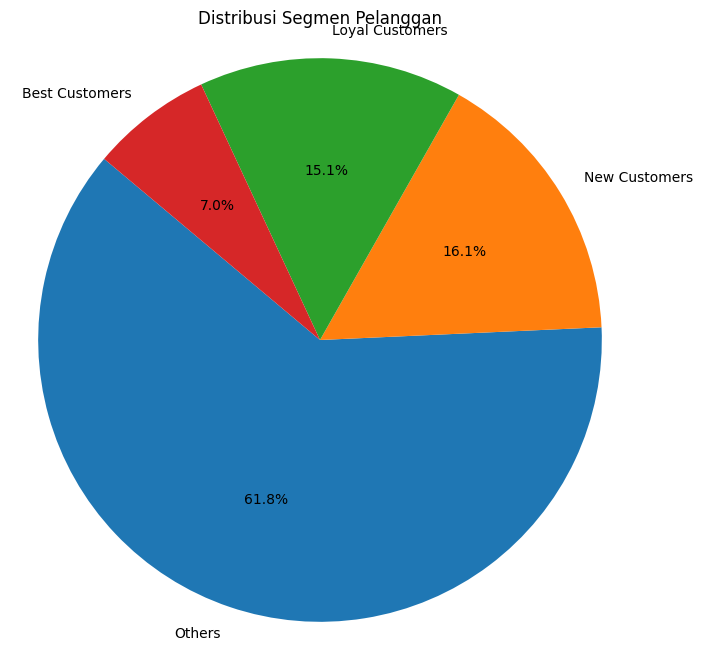

In [181]:
# Pie chart segmen pelanggan
segment_counts = rfm_data['Segment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(segment_counts.values, labels=segment_counts.index,
        autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Segmen Pelanggan')
plt.axis('equal')
plt.show()